# Project 3
## Scrape roles and names Text from multiple websites

[('rights', 126), ('discrimination', 126), ('human', 84), ('gender', 77), ('women', 70), ('education', 56), ('equality', 56), ('work', 49), ('australian', 42), ('australia', 42), ('business', 28), ('power', 28), ('2017', 28), ('doc', 28), ('all', 28), ('national', 28), ('economic', 28), ('2020', 28), ('awards', 21), ('information', 21), ('are', 21), ('subscribe', 21), ('media', 21), ('social', 21), ('children', 21), ('international', 21), ('projects', 21), ('employers', 21), ('complaints', 21), ('november', 21), ('commissioner', 21), ('world', 21), ('report', 21), ('against', 21), ('first', 21), ('as', 21), ('my', 21), ('with', 21), ('respect', 21), ('sexual', 21)]


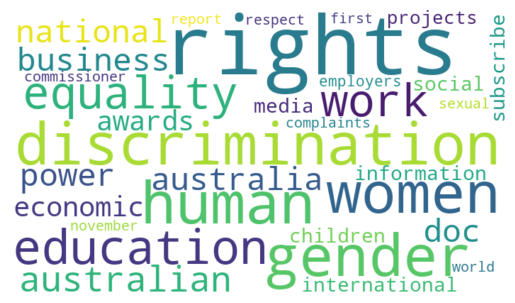

In [2]:
# Import necessary libraries
import requests  # Library for making HTTP requests
from bs4 import BeautifulSoup  # Library for parsing HTML
from collections import Counter  # Library for counting occurrences
import re  # Library for regular expressions
import csv  # Library for working with CSV files
import matplotlib.pyplot as plt  # Library for plotting
from wordcloud import WordCloud  # Library for creating word clouds
import pandas as pd  # Library for data manipulation

# List of base URLs to scrape
base_urls = [
    "https://humanrights.gov.au/our-work/education/face-facts-gender-equality-2018",
    "https://humanrights.gov.au/our-work/sex-discrimination/publications/unleashing-power-gender-equality-2017?_ga=2.226280728.300027987.1688536890-771838493.1688536890",
    "https://www.abs.gov.au/AUSSTATS/abs@.nsf/Lookup/4125.0Main+Features2Sep%202017?OpenDocument",
    "https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0256474",
    "https://copenhagenconsensus.com/sites/default/files/gender.pdf",
    "https://www.theguardian.com/business/2022/nov/29/gender-diversity-in-uk-tech-industry-still-terrible-says-martha-lane-fox",
    "https://www.theguardian.com/inequality/2022/apr/17/shock-absorbers-of-poverty-womens-lives-cut-short-by-their-unequal-position-in-society"
]

# List of page numbers to scrape
page_numbers = range(1, 8)  # Scrape pages 1 to 7

# Generate URLs by combining base URLs and page numbers
urls = [base_url + str(page) for base_url in base_urls for page in page_numbers]

# Set of stopwords to exclude from word counts
stopwords = {"and", "the", "of", "pdf", "in", "to", "sex", "have", "a", "on", "for", "menu", "we", "1", "is", "i",
             "footer", "middle", "what", "our", "publications", "s", "you", "download"}

# Counter to store word counts
word_counts = Counter()

# Loop through the URLs and scrape text content
for url in urls:
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            content = soup.select("body")
            text = " ".join([p.get_text() for p in content])
            words = re.findall(r'\b\w+\b', text.lower())
            word_counts.update(words)
    except requests.exceptions.RequestException as e:
        print(f"Error occurred while requesting {url}: {e}")

# Exclude stopwords from word_counts
filtered_word_counts = Counter({word: count for word, count in word_counts.items() if word not in stopwords})

# Get the most common 40 words
top_words = filtered_word_counts.most_common(40)
print(top_words)

# Save top words to a CSV file
csv_file = "top_words.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Word", "Count"])  # Write the header
    writer.writerows(top_words)

# Read the top words from the CSV file a create visualisation
df = pd.read_csv('top_words.csv')
text = ' '.join(df['Word'])
wordcloud = WordCloud(width=700, height=400, background_color='white').generate(text)
frequencies = wordcloud.process_text(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()





